# Marked Point Pattern

In addition to the [unmarked point pattern](pointpattern.ipynb), non-binary attributes might be associated with each point, leading to the so-called marked point pattern. The charactertistics of a marked point pattern are:

* Location pattern of the events are of interest
* Stochastic attribute attached to the events is of interest

Unmarked point pattern can be modified to be a marked point pattern using the method **add_marks** while the method **explode** could decompose a marked point pattern into a sequence of unmarked point patterns. Both methods belong to the class **PointPattern**.

In [1]:
from pointpats import PoissonPointProcess, PoissonClusterPointProcess, Window, poly_from_bbox, PointPattern
import libpysal as ps
from libpysal.cg import shapely_ext
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'


In [2]:
# open the virginia polygon shapefile
va = ps.io.open(ps.examples.get_path("virginia.shp"))
polys = [shp for shp in va]

In [3]:
# Create the exterior polygons for VA from the union of the county shapes
state = shapely_ext.cascaded_union(polys)
# create window from virginia state boundary
window = Window(state.parts)

In [4]:
window.bbox

[-83.67526245117188, 36.541481018066406, -75.24258422851562, 39.45690155029297]

In [5]:
window.centroid

(-78.85183583334933, 37.51851209850039)

In [6]:
samples = PoissonPointProcess(window, 200, 1, conditioning=False, asPP=False)

In [7]:
csr = PointPattern(samples.realizations[0])

In [8]:
cx, cy = window.centroid

In [9]:
cx

-78.85183583334933

In [10]:
cy

37.51851209850039

In [11]:
west = csr.points.x < cx
south = csr.points.y < cy
east = 1 - west
north = 1 - south

#### Create an attribute named quad which has a value for each event.

In [12]:
quad = 1 * east * north +  2 * west * north + 3 * west * south + 4 * east * south

In [13]:
type(quad)

pandas.core.series.Series

In [14]:
quad

0      1
1      3
2      1
3      4
4      1
5      1
6      1
7      4
8      1
9      3
10     1
11     4
12     1
13     3
14     4
15     2
16     3
17     3
18     4
19     3
20     3
21     3
22     2
23     3
24     2
25     4
26     1
27     1
28     1
29     1
      ..
170    1
171    4
172    4
173    4
174    1
175    1
176    3
177    3
178    3
179    1
180    4
181    4
182    1
183    1
184    3
185    1
186    4
187    4
188    1
189    3
190    3
191    1
192    1
193    4
194    2
195    2
196    3
197    2
198    3
199    1
Length: 200, dtype: int64

#### Attach the attribute quad to the point pattern 

In [15]:
csr.add_marks([quad], mark_names=['quad'])

In [16]:
csr.df

,x,y,quad
0,-78.053891,39.269977,1
1,-80.722252,37.264560,3
2,-77.505943,38.707540,1
3,-77.227168,36.800518,4
4,-77.293841,37.533684,1
5,-78.401097,37.648026,1
6,-77.347530,39.013155,1
7,-78.274185,37.424484,4
8,-78.375259,38.381770,1
9,-79.390132,36.776448,3


#### Explode a marked point pattern into a sequence of individual point patterns. Since the mark quad has 4 unique values, the sequence will be of length 4.

In [17]:
csr_q = csr.explode('quad')

In [18]:
len(csr_q)

4

In [19]:
csr

In [20]:
csr.summary()

Point Pattern
200 points
Bounding rectangle [(-83.56692257960756,36.57151274569622), (-75.66076112672403,39.316803366254646)]
Area of window: 21.704710881221757
Intensity estimate for window: 9.214589454542507
           x          y  quad
0 -78.053891  39.269977     1
1 -80.722252  37.264560     3
2 -77.505943  38.707540     1
3 -77.227168  36.800518     4
4 -77.293841  37.533684     1


#### Plot the 4 individual sequences

In [21]:
plt.xlim?

Signature: plt.xlim(*args, **kwargs)
Docstring:
Get or set the x limits of the current axes.

Call signatures::

    left, right = xlim()  # return the current xlim
    xlim((left, right))   # set the xlim to left, right
    xlim(left, right)     # set the xlim to left, right

If you do not specify args, you can pass *left* or *right* as kwargs,
i.e.::

    xlim(right=3)  # adjust the right leaving left unchanged
    xlim(left=1)  # adjust the left leaving right unchanged

Setting limits turns autoscaling off for the x-axis.

Returns
-------
left, right
    A tuple of the new x-axis limits.

Notes
-----
Calling this function with no arguments (e.g. ``xlim()``) is the pyplot
equivalent of calling `~.Axes.get_xlim` on the current axes.
Calling this function with arguments is the pyplot equivalent of calling
`~.Axes.set_xlim` on the current axes. All arguments are passed though.
File:      /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py
T

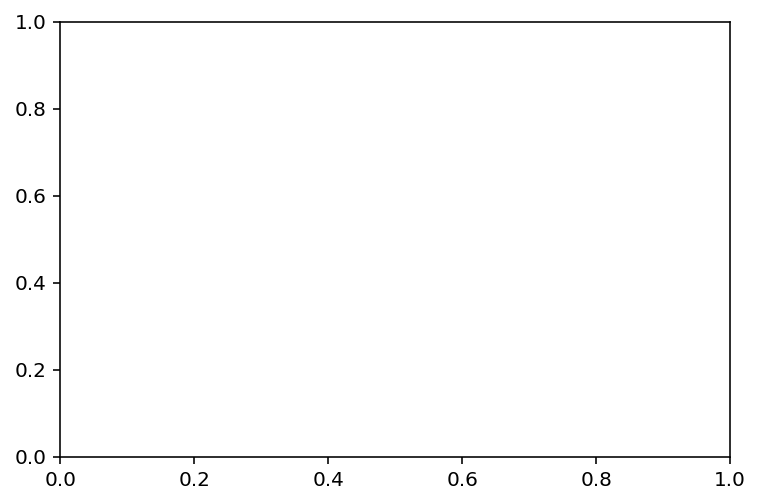

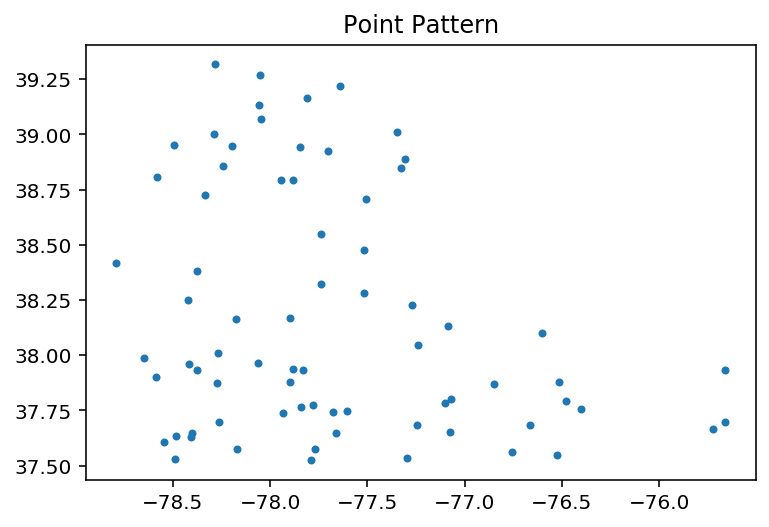

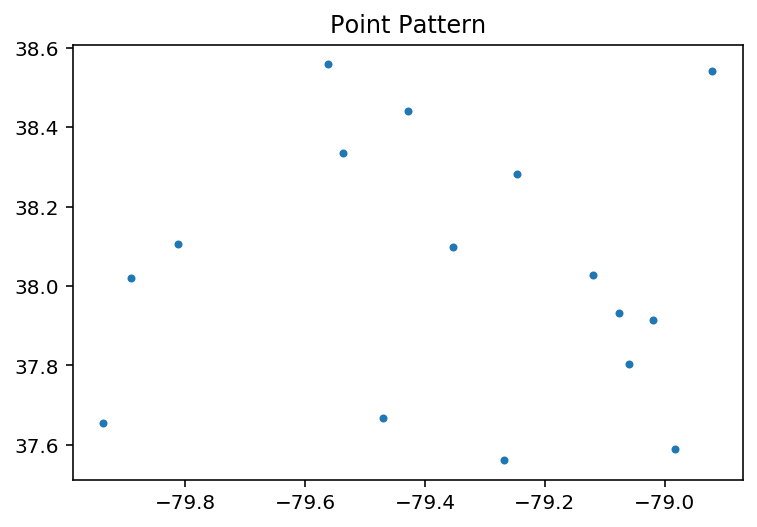

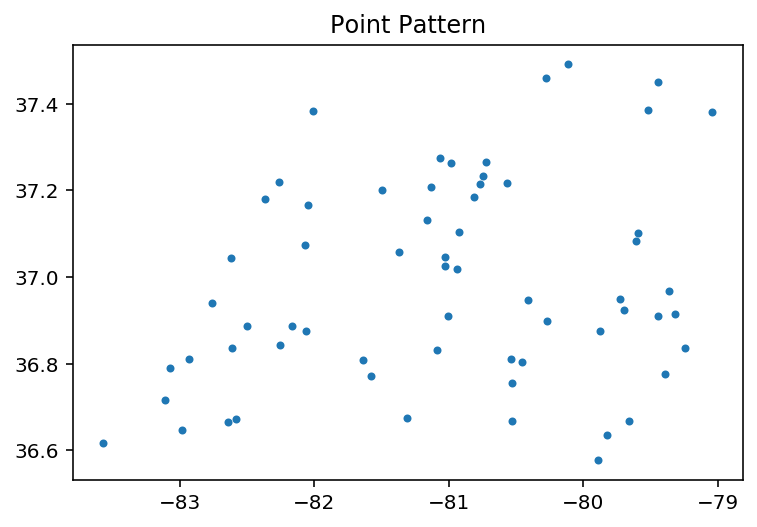

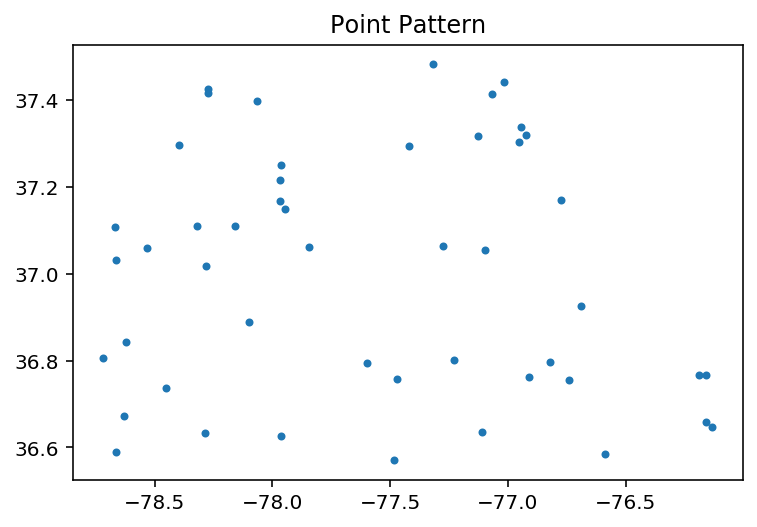

In [22]:
plt.xlim()
for ppn in csr_q:
    ppn.plot()

#### Plot the 4 unmarked point patterns using the same axes for a convenient comparison of locations

In [23]:
x0, y0, x1, y1 = csr.mbb
ylim = (y0, y1)
xlim = (x0, x1)

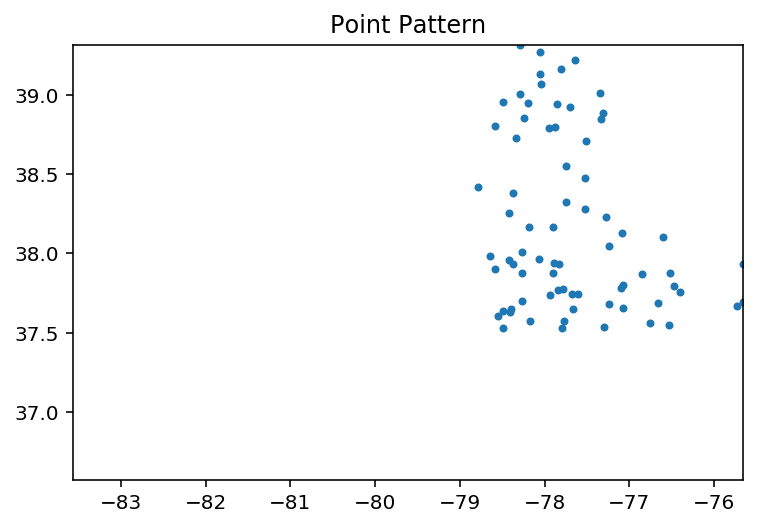

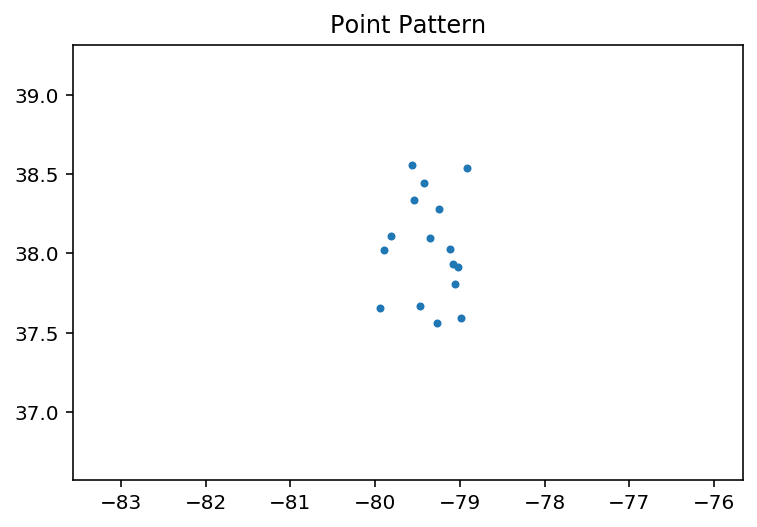

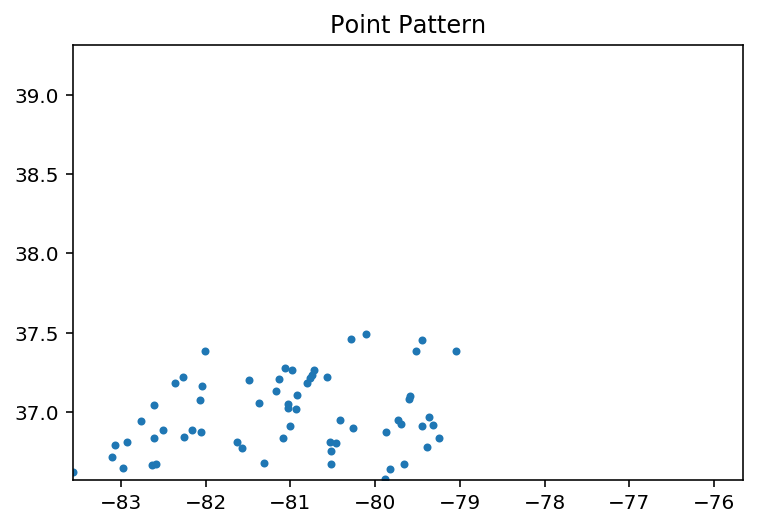

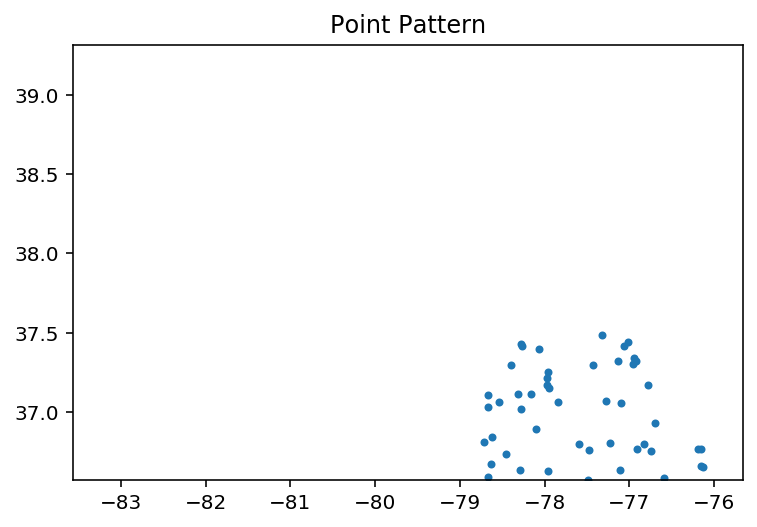

In [24]:
for ppn in csr_q:
    ppn.plot()
    plt.xlim(xlim)
    plt.ylim(ylim)